In [1]:
import sys

sys.path.append("..")

In [2]:
from config import config
from config import config_indicators

from preprocessor.findata_downloader import FinancialDataDownloader
from preprocessor.findata_preprocessor import FinancialDataPreprocessor
from visualiser.findata_visualiser import FinancialDataVisualiser

In [3]:
findownloader = FinancialDataDownloader(config.START_DATE, config.END_DATE)
data = findownloader.load_data("../" + config.DATA_DIR, config.TEST_NAME)

Data loaded from ../data/test.csv


In [4]:
finpreprocessor = FinancialDataPreprocessor(config.START_DATE, config.END_DATE)
data = finpreprocessor.preprocess(
    data,
    config.EXCHANGE_NYSE,
    config.USE_TECHNICAL_INDICATORS,
    list(config_indicators.TECHNICAL_INDICATORS.keys()),
    config.USE_MACROECONOMIC_INDICATORS,
    list(config_indicators.MACROECONOMIC_INDICATORS.keys()),
)

Data downloaded for 1 tickers from 2016-01-01 to 2025-01-01.


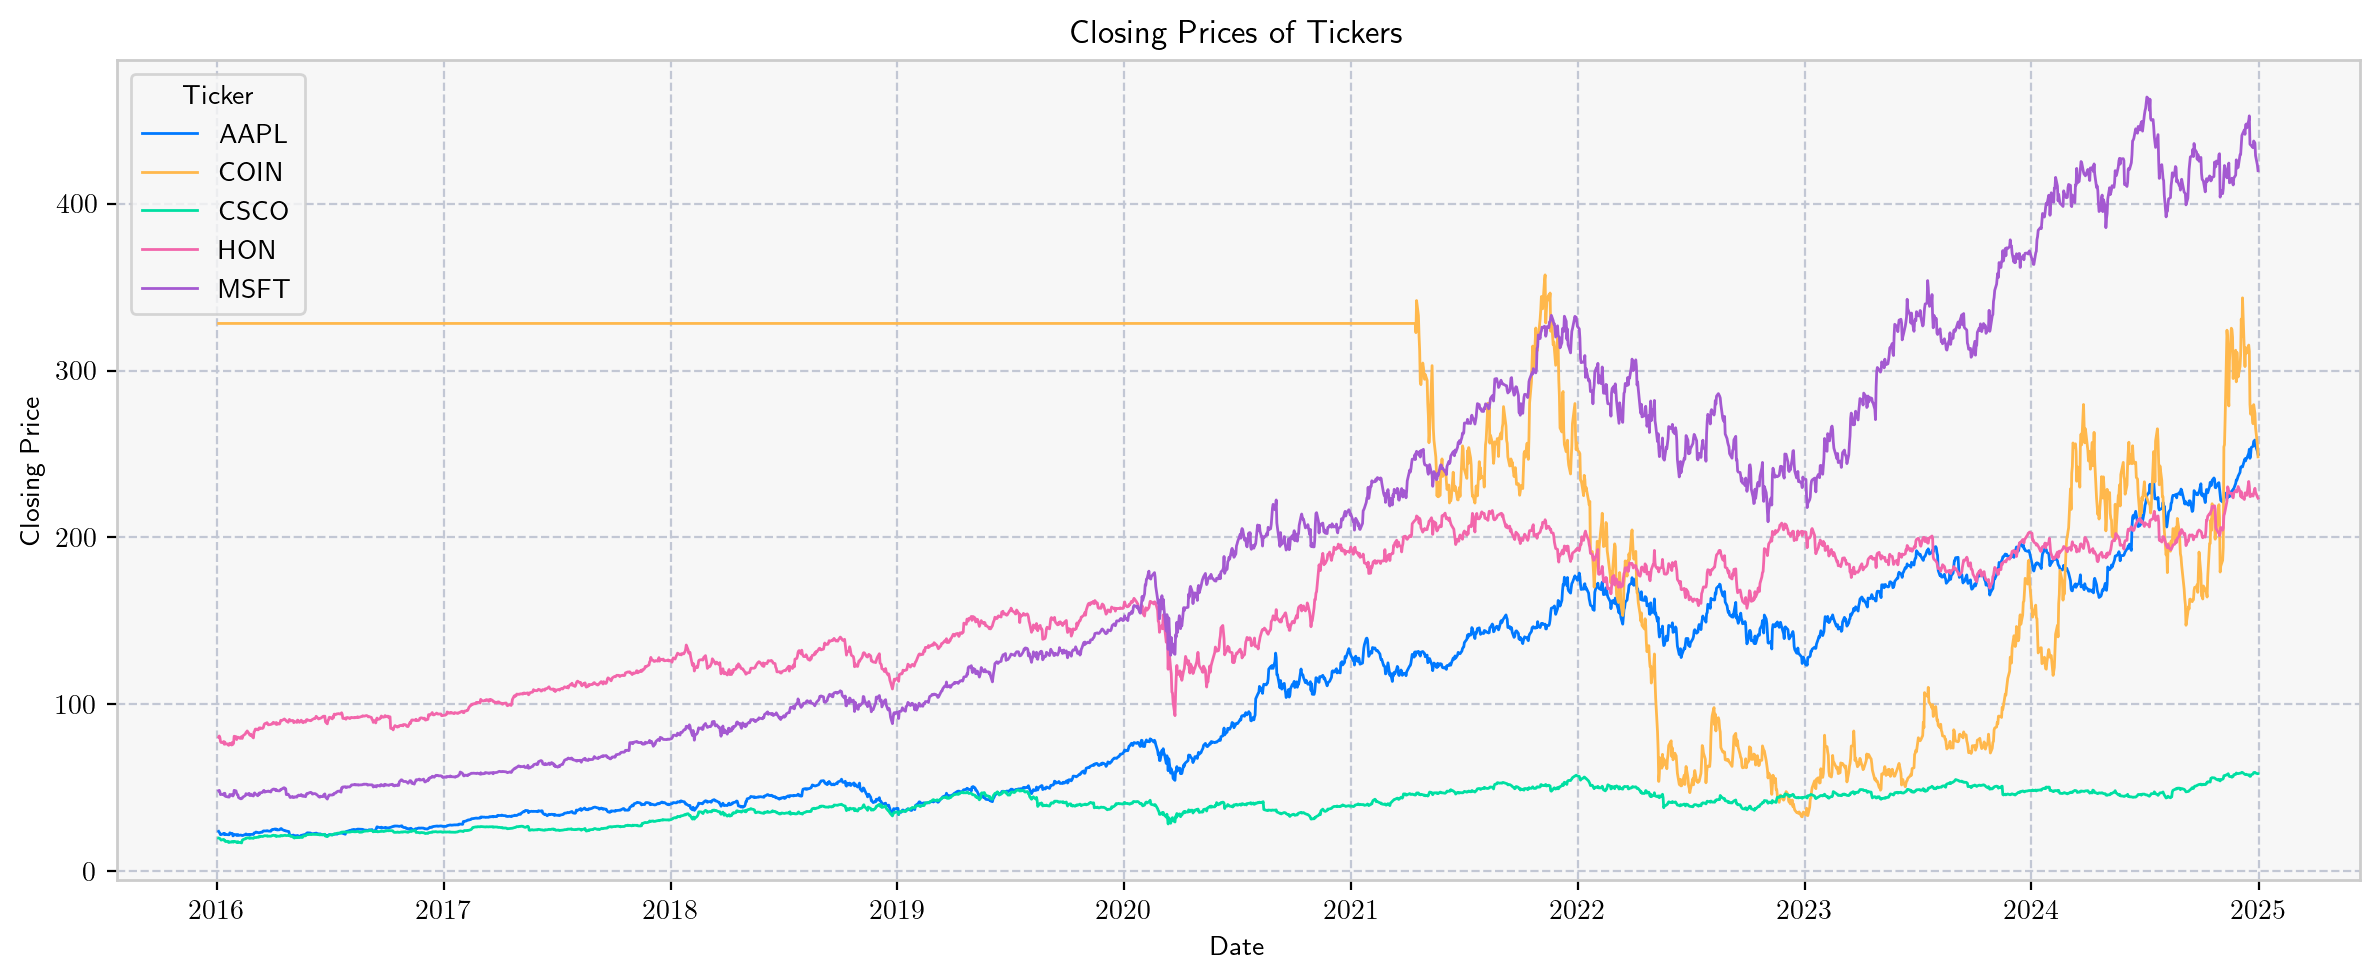

In [5]:
finvisualiser = FinancialDataVisualiser()
finvisualiser.plot_close_prices(
    data, "../" + config.PLOT_DIR, config.TEST_NAME + "_processed"
)

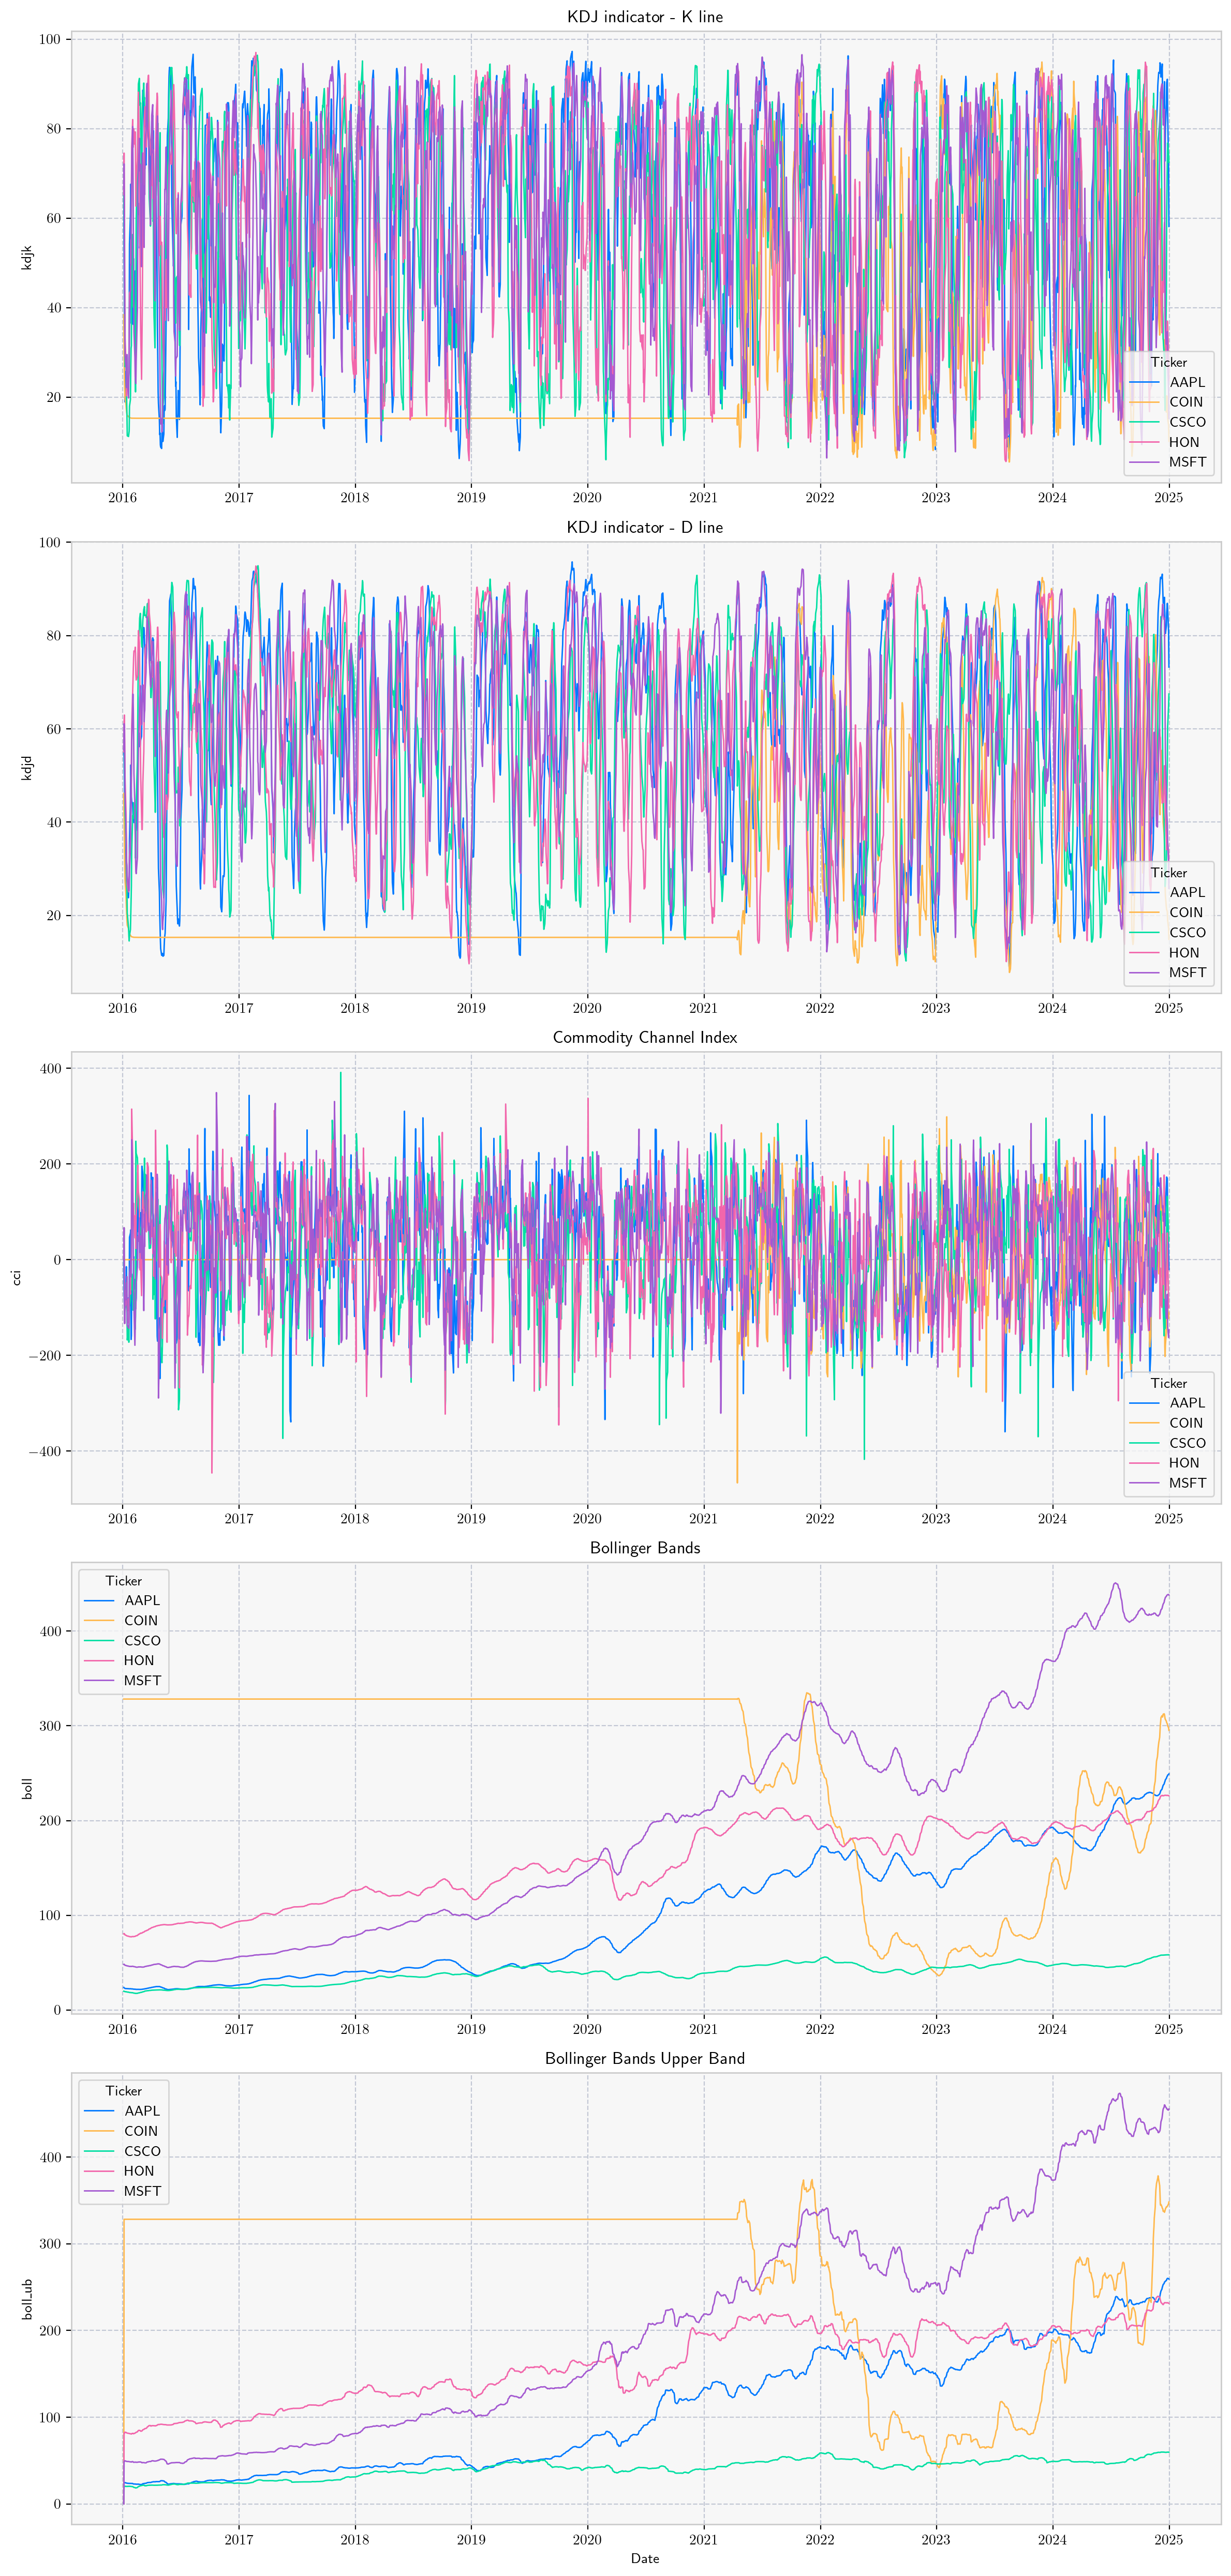

In [6]:
finvisualiser.plot_technical_indicators(
    data,
    config_indicators.TECHNICAL_INDICATORS,
    "../" + config.PLOT_DIR,
    config.TEST_NAME,
)

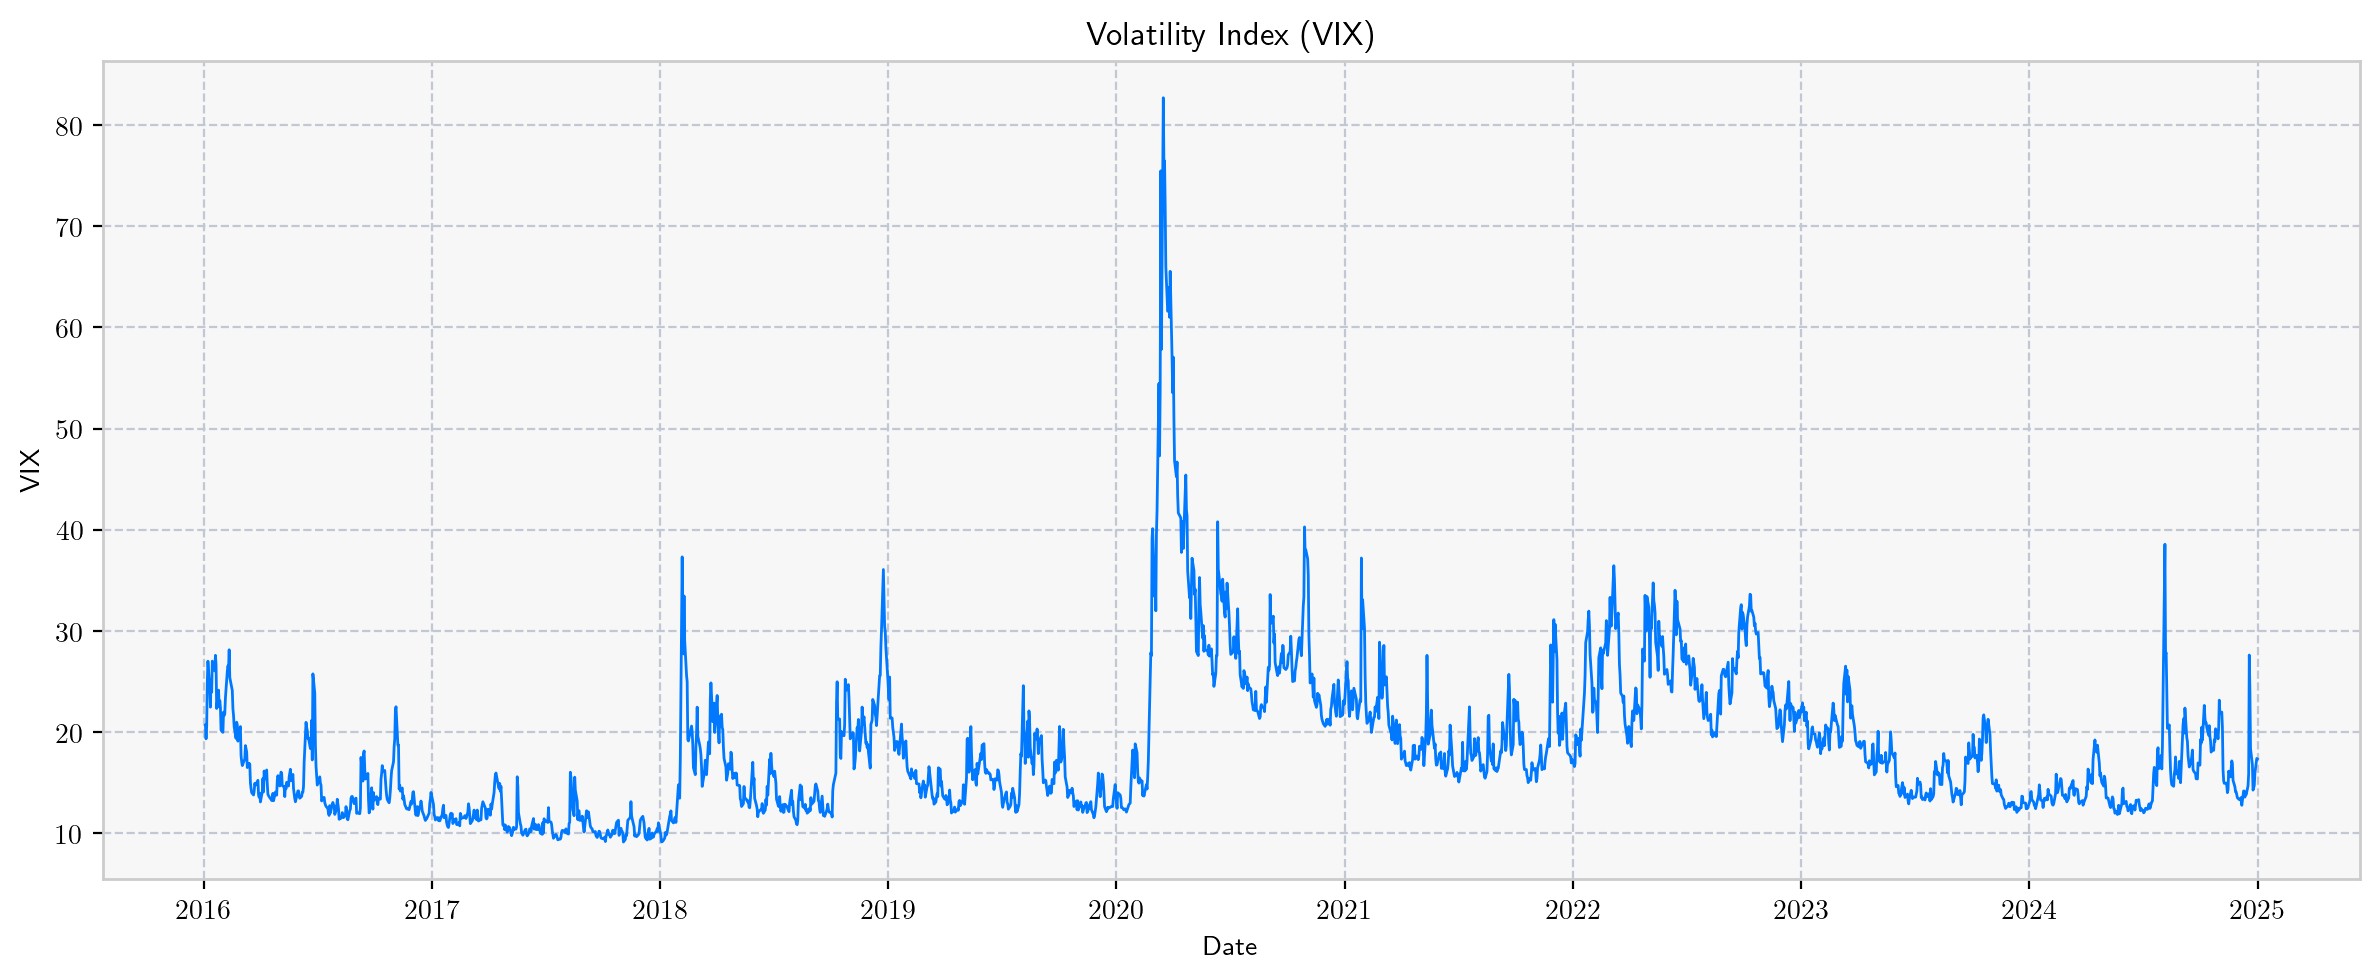

In [7]:
finvisualiser.plot_macroeconomic_indicators(
    data,
    config_indicators.MACROECONOMIC_INDICATORS,
    "../" + config.PLOT_DIR,
    config.TEST_NAME,
)

In [8]:
train_data, test_data = finpreprocessor.split_train_test(
    data, config.TRAIN_END_DATE
)

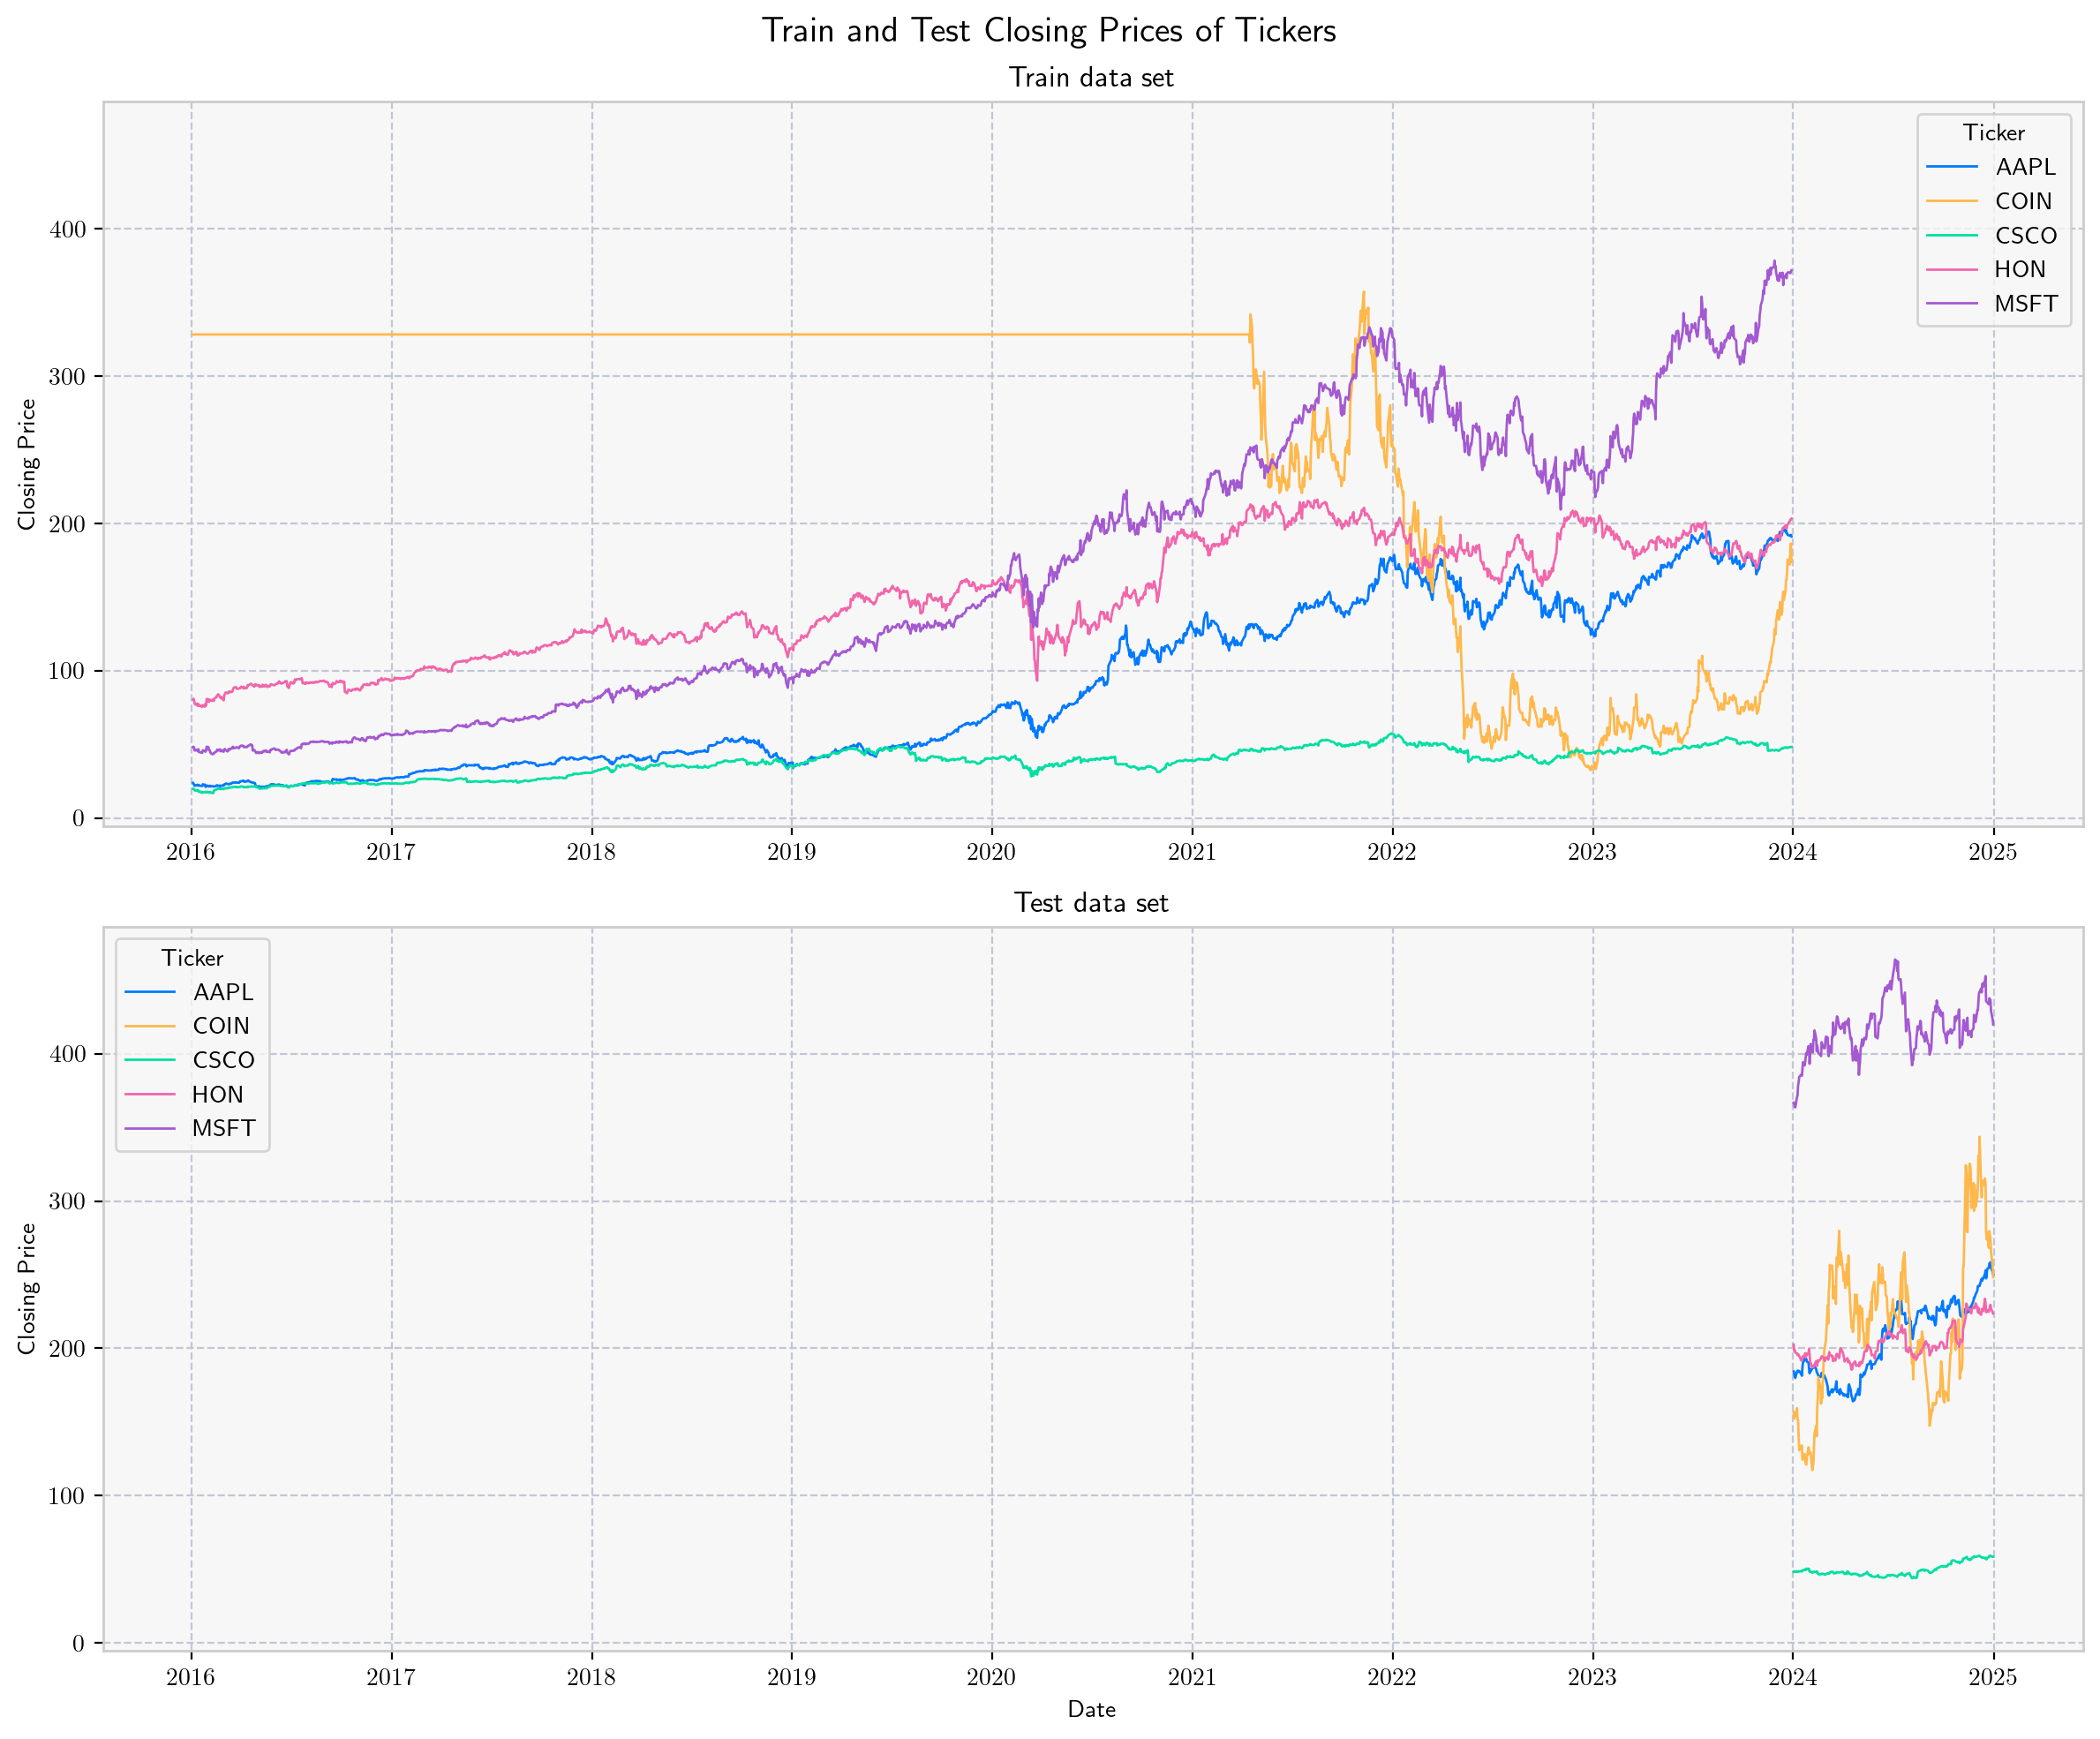

In [9]:
finvisualiser.plot_train_test_close_prices(
    train_data, test_data, "../" + config.PLOT_DIR, config.TEST_NAME
)